In [1]:
# Observations:
# 1. From the bar chart of mouse count by treatment regimen, it is clear that the experiment biased 
#    Capomulin and Ramicane in terms of testing rate. For more unbiased and reliable data, the company
#    should have included equal test subjects across all treatment regimen.
# 2. On the other hand, the pie chart of subject sex distrubtion reveals that the experiment did not bias 
#    for or against a particular sex. This suggests that the results of the experiment are, in theory, replicable
#    across all sexes.
# 3. From the plot of tumor volume vs. timepoint for mouse s185, there exists a clearly downward trend in tumor size
#    over time. Thus, for this particular mouse at least, one could conclude that the treatment was effective.
# 4. Lastly, from the plot of mouse weight vs. tumor volume, it appears that weight increased proportionally 
#    (i.e. approximately in a 1:1 ratio) with increasing tumor volume. This suggests that each mm3 of tumor volume 
#    added constitutes a significant change in mice's overall weight distribution.

In [2]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [3]:
# Read in data
mouse_metadata = pd.read_csv("../Resources/mouse_metadata.csv")
study_df = pd.read_csv("../Resources/study_results.csv")

# Combine data into a single dataset
study_merged_df = pd.merge(mouse_metadata,study_df, on = "Mouse ID")
study_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Check the number of mice in unclean dataset
mouse_count = study_merged_df["Mouse ID"].value_counts()

# Find duplicate mice by index & ID number 
duplicate_rows = study_merged_df.duplicated(subset = ["Mouse ID","Timepoint"])

index = 0 
duplicated_indices = []
duplicated_ids = []

for row in duplicate_rows:
    if (row == True):
        duplicated_indices.append(index)
    index=index+1
 
for item in duplicated_indices:
    duplicated_id = study_merged_df.iloc[item,0]
    duplicated_ids.append(duplicated_id)

duplicated_ids

['g989', 'g989', 'g989', 'g989', 'g989']

In [5]:
#Drop duplicated rows by index
for item in duplicated_indices:
    study_merged_df = study_merged_df.drop(index=item)
    
# Check the number of mice in the clean dataset
mouse_count = study_merged_df["Mouse ID"].value_counts()

In [6]:
# Generate a summary statistics table for tumor volume for each regimen by combining stats series into stats DataFrame
summary_stats = []
stats_dict = {}

drugs_list = study_merged_df["Drug Regimen"].value_counts()
drugs_df = pd.DataFrame(drugs_list)
drug_regimen = drugs_df.index

for drug in drug_regimen:
    drug_vol_df = study_merged_df.loc[study_merged_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    vol_mean = round(np.mean(drug_vol_df),2)
    vol_median = round(np.median(drug_vol_df),2)
    vol_var = round(drug_vol_df.var(),2)
    vol_stdev = round(drug_vol_df.std(),2)
    vol_sem = round(sem(drug_vol_df),2)
    stats_dict = {"Drug Regimen": drug, "Mean": vol_mean, "Median": vol_median, "Variance": vol_var, 
                 "Standard Deviation": vol_stdev, "Standard Error":vol_sem}
    summary_stats.append(stats_dict)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.set_index("Drug Regimen")
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ramicane,40.22,40.67,23.49,4.85,0.32
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Zoniferol,53.24,51.82,48.53,6.97,0.52
Stelasyn,54.23,52.43,59.45,7.71,0.57
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49


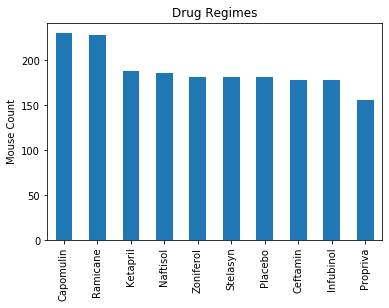

In [7]:
# Generate bar plot of mouse count for each treatment using pandas
drugs_plot = drugs_list.plot(kind = "bar")

plt.title("Drug Regimes")
plt.ylabel("Mouse Count")
plt.show()

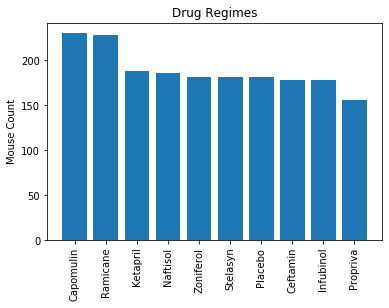

In [10]:
# Generate bar plot of mouse count for each treatment using pyplot
x_axis = drug_regimen
y_axis = []

for i in drugs_list:
    y_axis.append(i)

plt.bar(x_axis,y_axis)
plt.title("Drug Regimes")
plt.ylabel("Mouse Count")
plt.xticks(rotation=90)
plt.show()

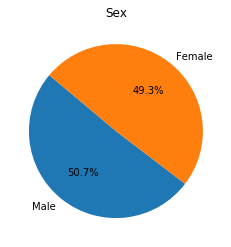

In [11]:
# Generate pie plot showing the distribution of female versus male mice using pyplot

sex_df = study_merged_df["Sex"]
sex_series = sex_df.value_counts()
labels = sex_series.index

sex_plot = plt.pie(sex_series,startangle=140,labels=labels,autopct="%1.1f%%")
plt.title("Sex")
plt.show()

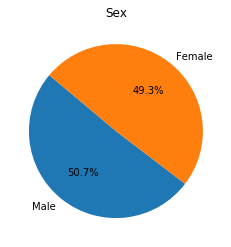

In [12]:
# Generate pie plot showing the distribution of female versus male mice using pandas
sex_series.plot(kind="pie",startangle=140,autopct="%1.1f%%")
plt.title("Sex")
plt.ylabel('')
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
mice_list = study_merged_df["Mouse ID"].value_counts()
mice_df = pd.DataFrame(mice_list)
mouse_ids = mice_df.index

final_vol_dict = {}
final_vol_list = []

for name in mouse_ids:
    mouse_df = study_merged_df.loc[study_merged_df["Mouse ID"]==name]
    drug_regimen = mouse_df.iloc[-1,1]
    final_vol = mouse_df.iloc[-1,6]
    final_vol_dict = {"Mouse ID": name, "Drug Regimen": drug_regimen, "Final Tumor Volume (mm3)": final_vol}
    final_vol_list.append(final_vol_dict)

final_vol_df = pd.DataFrame(final_vol_list)

Capomulin_tumorvol = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Capomulin","Final Tumor Volume (mm3)"]
Ramicane_tumorvol = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Ramicane","Final Tumor Volume (mm3)"]
Infubinol_tumorvol = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Infubinol","Final Tumor Volume (mm3)"]
Ceftamin_tumorvol = final_vol_df.loc[final_vol_df["Drug Regimen"] == "Ceftamin","Final Tumor Volume (mm3)"]

In [14]:
#Question: Are we supposed to find quartiles, IQR, etc. for the final tumor vol data or overall?

# Put top 4 treatments into a list for for loop 
top_4_drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Calculate the IQR and quantitatively determine potential outliers. Print results 

for drug in top_4_drugs:
    potential_outlier_list = []
    
    drug_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == drug,"Final Tumor Volume (mm3)"]
    
    drug_quartiles = drug_df.quantile([.25,.5,.75])
    drug_lowerq = drug_quartiles[0.25]
    drug_upperq = drug_quartiles[0.75]
    drug_iqr = drug_upperq-drug_lowerq

    drug_lower_bound = round(drug_lowerq - (1.5*drug_iqr),2)
    drug_upper_bound = round(drug_upperq + (1.5*drug_iqr),2)
    
    print(f"{drug} Potential Outliers:")
    print(f"Above {drug_upper_bound}mm3, Below {drug_lower_bound}mm3")

    drug_overall_df = final_vol_df.loc[final_vol_df["Drug Regimen"] == drug]
    potential_outlier_ids = drug_overall_df.loc[(drug_overall_df["Final Tumor Volume (mm3)"]<drug_lower_bound) | (drug_overall_df["Final Tumor Volume (mm3)"]>drug_upper_bound),"Mouse ID"]
    
    for name in potential_outlier_ids:
        potential_outlier_list.append(name)
    
    print(f"Potential Outlier Mouse IDs: {potential_outlier_list}")
    print("--------------------------------------")
    

Capomulin Potential Outliers:
Above 51.83mm3, Below 20.7mm3
Potential Outlier Mouse IDs: []
--------------------------------------
Ramicane Potential Outliers:
Above 54.31mm3, Below 17.91mm3
Potential Outlier Mouse IDs: []
--------------------------------------
Infubinol Potential Outliers:
Above 82.74mm3, Below 36.83mm3
Potential Outlier Mouse IDs: ['c326']
--------------------------------------
Ceftamin Potential Outliers:
Above 87.67mm3, Below 25.36mm3
Potential Outlier Mouse IDs: []
--------------------------------------


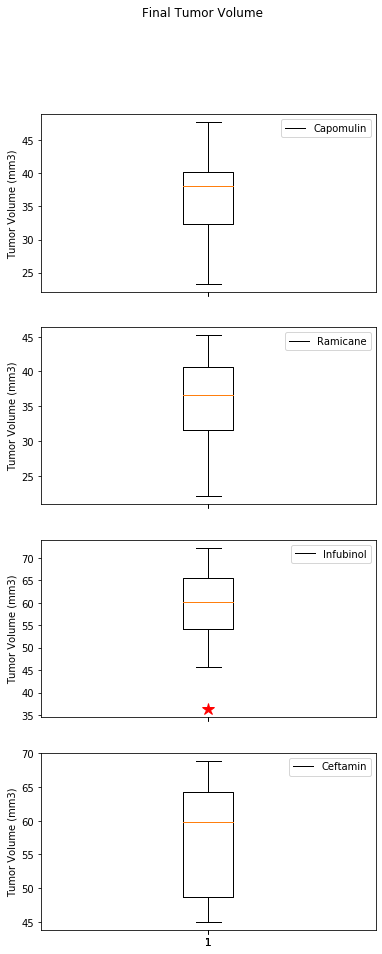

In [15]:
#Question: Are we making a facet plot of box & whiskers?


# Generate a box plot of the final tumor volume of each mouse across the top 4 drugs in single figure
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, figsize = (6,15))
fig1.suptitle("Final Tumor Volume")

flierprops = dict(marker='*', markerfacecolor='r', markersize=12, markeredgecolor='r')

ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(Capomulin_tumorvol, sym="*", flierprops=flierprops)
ax1.legend(["Capomulin"])

ax2.set_ylabel("Tumor Volume (mm3)")
ax2.boxplot(Ramicane_tumorvol, sym="*", flierprops=flierprops)
ax2.legend(["Ramicane"])

ax3.set_ylabel("Tumor Volume (mm3)")
ax3.boxplot(Infubinol_tumorvol, sym="*", flierprops=flierprops)
ax3.legend(["Infubinol"])

ax4.set_ylabel("Tumor Volume (mm3)")
ax4.boxplot(Ceftamin_tumorvol, sym="*", flierprops=flierprops)
ax4.legend(["Ceftamin"])

plt.show()

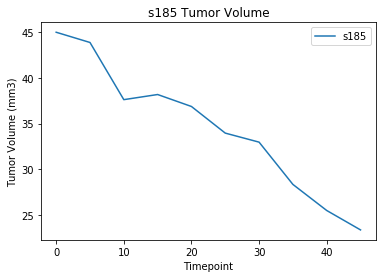

In [16]:
# Generate a line plot of tumor volume vs timepoint for a mouse treated with Capomulin (s185)
cap_overall_df = study_merged_df.loc[study_merged_df["Drug Regimen"] == "Capomulin"]
s185_df = cap_overall_df.loc[cap_overall_df["Mouse ID"]=="s185",["Timepoint","Tumor Volume (mm3)"]]
s185_df = s185_df.set_index("Timepoint")

s185_plot, = plt.plot(s185_df,label="s185")
plt.title("s185 Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[s185_plot],loc="best")
plt.show()

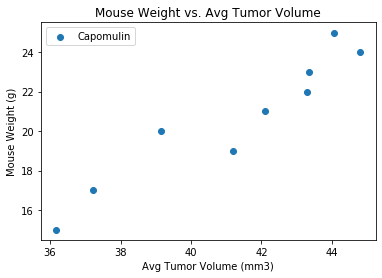

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_weightvol_df = cap_overall_df[["Weight (g)","Tumor Volume (mm3)"]]
cap_weightvol_df = cap_weightvol_df.set_index("Weight (g)")
grouped_cap_weightvol_df = cap_weightvol_df.groupby("Weight (g)")
grouped_cap_weightvol_df = grouped_cap_weightvol_df.mean()
grouped_cap_weightvol_df = grouped_cap_weightvol_df.reset_index()

cap_x = grouped_cap_weightvol_df.iloc[:,1]
cap_y = grouped_cap_weightvol_df.iloc[:,0]

cap_weightvol_plot = plt.scatter(cap_x,cap_y)
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.legend(["Capomulin"],loc="best")
plt.show()

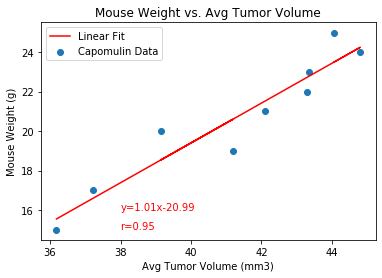

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(cap_slope, cap_intercept, cap_r, cap_p, cap_sem) = linregress(cap_x, cap_y)

cap_fit = cap_slope * cap_x + cap_intercept
line_eq = "y=" + str(round(cap_slope,2)) + "x" + str(round(cap_intercept,2))
r_value = "r=" +str(round(cap_r,2))

cap_weightvol_plot = plt.scatter(cap_x,cap_y)
cap_fit = plt.plot(cap_x, cap_fit,"r-")
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.annotate(line_eq,(38,16),color="red")
plt.annotate(r_value,(38,15),color="red")
plt.xlabel("Avg Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.legend(["Linear Fit","Capomulin Data"])
plt.show()